# Evolve a population of sources

### Initialise a random set of sources

In [1]:
import legwork as lw
import numpy as np
import astropy.units as u

In [48]:
n_sources = 20000
m_1 = np.random.uniform(1, 10, n_sources) * u.Msun
m_2 = np.random.uniform(0, 1, n_sources) * m_1
dist = np.random.uniform(0, 30, n_sources) * u.kpc
ecc = np.random.uniform(0, 0.9, n_sources)
f_orb = 10**(np.random.uniform(-6, -3, n_sources)) * u.Hz

In [74]:
sources = lw.source.Source(m_1=m_1, m_2=m_2, dist=dist, ecc=ecc, f_orb=f_orb)

In [75]:
sources.get_snr()

array([5.76001935e-05, 1.38346519e-06, 1.02847602e+01, ...,
       2.49434524e+01, 1.03380244e-01, 3.32521656e+01])

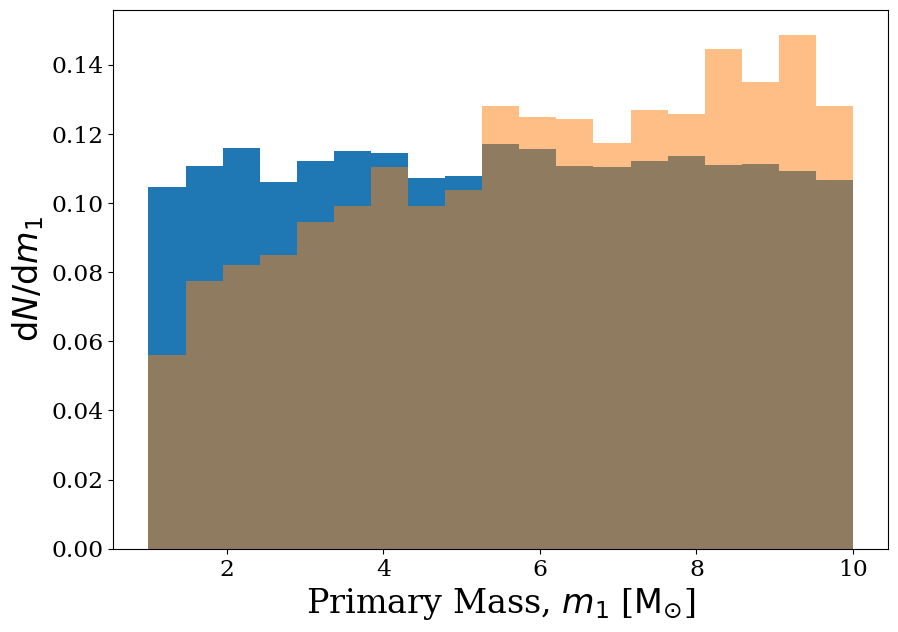

In [81]:
fig, ax = sources.plot_source_variables("m_1", bins=np.linspace(1, 10, 20), show=False)
fig, ax = sources.plot_source_variables("m_1", bins=np.linspace(1, 10, 20), which_sources=sources.snr > 7, fig=fig, ax=ax, alpha=0.5)

### Calculate merger times

In [61]:
sources.get_merger_time()

<Quantity [8.68496075e+01, 3.18926684e+02, 5.98114556e-04, ...,
           5.39960045e-04, 8.33709147e-02, 1.18154068e-04] Gyr>

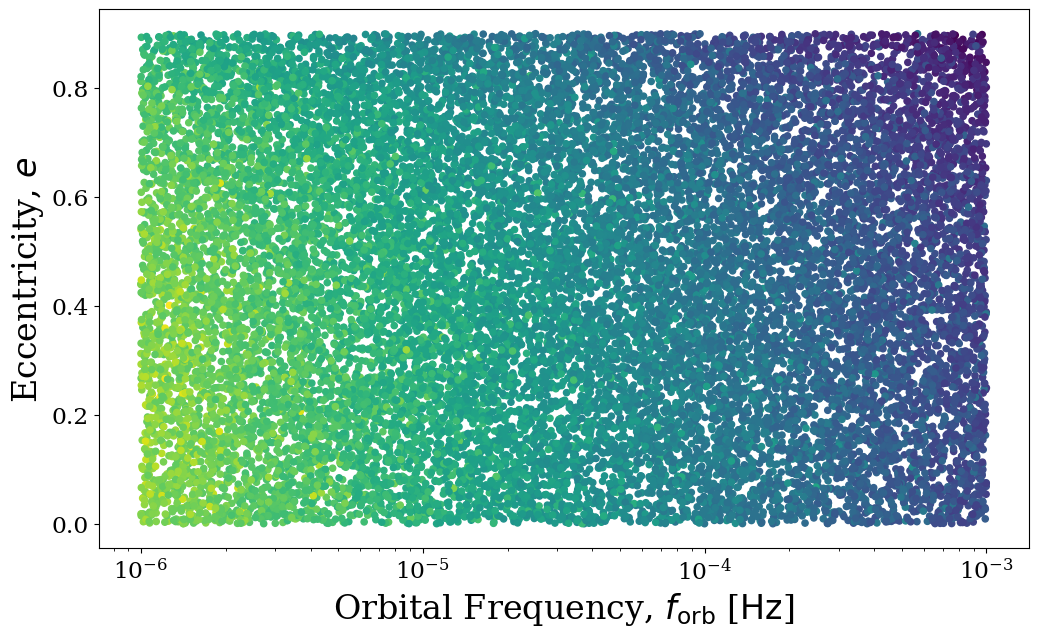

(<Figure size 1200x700 with 1 Axes>,
 <Axes: xlabel='Orbital Frequency, $f_{\\rm orb}$ [$\\mathrm{Hz}$]', ylabel='Eccentricity, $e$'>)

In [65]:
sources.plot_source_variables("f_orb", "ecc", log_scale=(True, False),
                              c=np.log10(sources.t_merge.to(u.Myr).value[~sources.merged]))

### Evolve sources

In [66]:
sources.evolve_sources(100 * u.Myr)

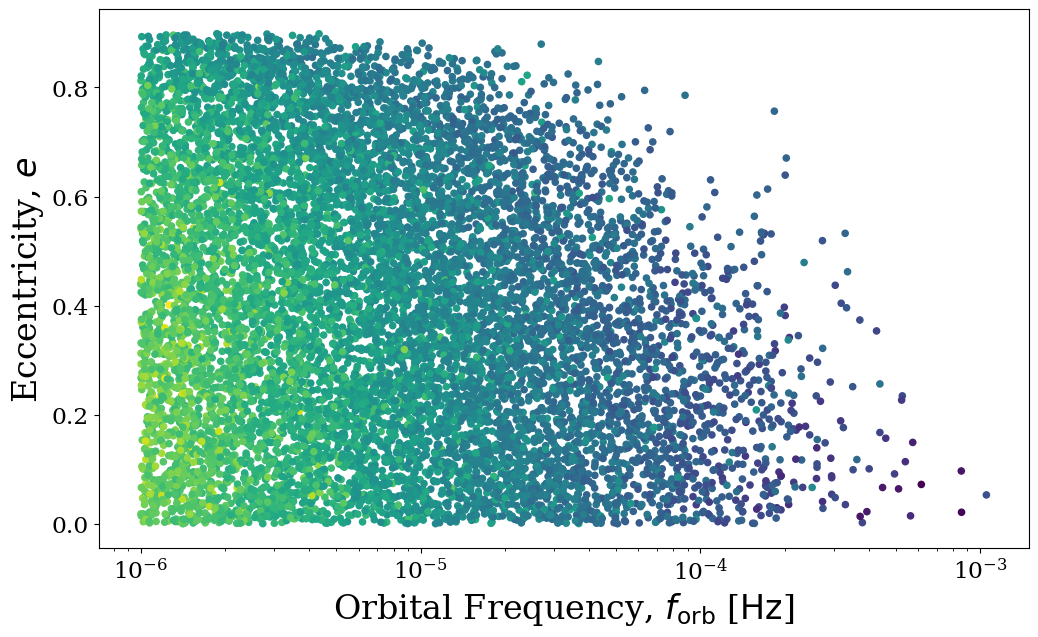

(<Figure size 1200x700 with 1 Axes>,
 <Axes: xlabel='Orbital Frequency, $f_{\\rm orb}$ [$\\mathrm{Hz}$]', ylabel='Eccentricity, $e$'>)

In [67]:
sources.plot_source_variables("f_orb", "ecc", log_scale=(True, False),
                              c=np.log10(sources.t_merge[~sources.merged].to(u.Myr).value))

### Evolve sources different times

In [70]:
sources.evolve_sources(np.random.uniform(0, 10, n_sources) * u.Myr)